# Pymaceuticals Inc.
---

### Analysis

- Based on review of the boxplots created in the Quartiles, Outliers and Boxplots section and out of the four drug regimens reviewed, Capomulin and Ramicane show significant efficacy as a potential treatment for squamous cell carcinoma (SCC), when compared to Infubinol and Ceftamin.
- Additionally, based on the review of Summary Statistics section and compared to all the drug regimens in the study, Capomulin and Ramicane show significant efficacy as a potential treatment for SCC, as these two regimens are the only treatments that, based on mean and median values of tumor volume, show values that are below the starting tumor volume values of 45 mm3.  All other regimens reviewed had values above the starting tumor volume values.
- In reviewing the charts and correlation value created in the Correlation and Regression section, the correlation between mouse weight and average tumor volume shows a very strong correlation, as the value is close to +1, which indicates that mouse weight is a very strong indicator of the size of the mouse's tumor volume. The regression chart plotted also shows a positive correlation as, based on the best fit line, the slope indicates that for every additional gram that the weight of a mouse is, that the tumor volume increases by 0.95 mm3.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

    # This allows the display of more than one variable in a cell
    # without having to explicitly invoke the display command:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_df = pd.merge(study_results, mouse_metadata, how="inner", on="Mouse ID")

# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
len(mouse_data_df["Mouse ID"].unique())

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Find duplicate data
duplicate_data = mouse_data_df[mouse_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]
duplicate_data = duplicate_data["Mouse ID"].unique()
duplicate_data

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_df.loc[mouse_data_df['Mouse ID'].isin(duplicate_data)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data_df = mouse_data_df.drop(mouse_data_df[mouse_data_df["Mouse ID"].isin(duplicate_data)].index)
clean_mice_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance ##(assuming population by applying a factor of "ddof=1")##, standard deviation ("ddof=1" also applied),
# and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

clean_mice_data_df = clean_mice_data_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume'})
clean_mice_data_df2 = clean_mice_data_df[["Drug Regimen","Tumor Volume"]]

clean_mice_stats_df = []
mean_tum_vol = clean_mice_data_df2.groupby(clean_mice_data_df2["Drug Regimen"])["Tumor Volume"].apply(np.mean)
med_tum_vol = clean_mice_data_df2.groupby(clean_mice_data_df2["Drug Regimen"])["Tumor Volume"].apply(np.median)
var_tum_vol = clean_mice_data_df2.groupby(clean_mice_data_df2["Drug Regimen"])["Tumor Volume"].agg(np.var, ddof=1)
std_tum_vol = clean_mice_data_df2.groupby(clean_mice_data_df2["Drug Regimen"])["Tumor Volume"].agg(np.std, ddof=1)
sem_tum_vol = clean_mice_data_df2.groupby(clean_mice_data_df2["Drug Regimen"])["Tumor Volume"].sem()

clean_mice_stats_df = pd.DataFrame({"Mean Tumor Volume":mean_tum_vol,
                                    "Median Tumor Volume":med_tum_vol,
                                    "Tumor Volume Variance":var_tum_vol,
                                    "Tumor Volume Std. Dev.":std_tum_vol,
                                    "Tumor Volume Std. Err.":sem_tum_vol})
clean_mice_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_stats_data_df2 = clean_mice_data_df2.groupby(["Drug Regimen"])["Tumor Volume"].agg(["mean","median","var","std","sem"])

#Formatting and output
column_headers = [("Tumor Volume (mm3)","mean"),
                  ("Tumor Volume (mm3)","median"),
                  ("Tumor Volume (mm3)","var"),
                  ("Tumor Volume (mm3)","std"),
                  ("Tumor Volume (mm3)","sem")]
clean_stats_data_df2.columns=pd.MultiIndex.from_tuples(column_headers)
clean_stats_data_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

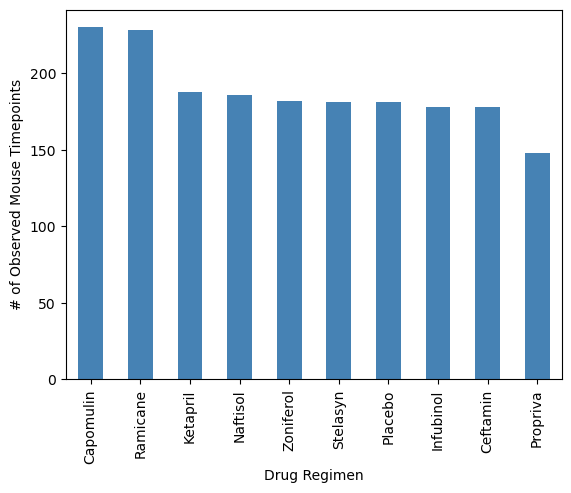

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

##Establish dataframe to analyze in preparation for bar chart
bar_chart_count = clean_mice_data_df.groupby("Drug Regimen").size()
x_labels = list(bar_chart_count.index)
bar_chart_df = pd.DataFrame({"Drug Regimen":x_labels,"# of Observed Mouse Timepoints":bar_chart_count}).reset_index(drop=True)
bar_chart_df = bar_chart_df.sort_values(["# of Observed Mouse Timepoints", "Drug Regimen"], ascending=[False, False])
bar_chart_df1 = bar_chart_df.set_index(bar_chart_df.columns[0])

##Prepare and output bar chart in Pandas
bar_chart_df1.plot(kind="bar", ylabel="# of Observed Mouse Timepoints", legend=False, color="steelblue");

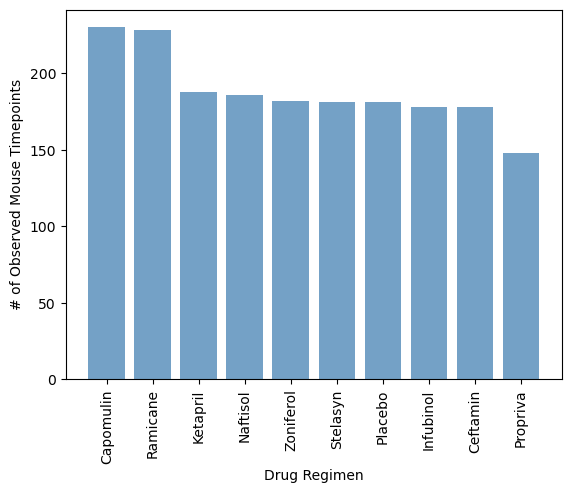

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

##Using the dataframes from the previous code block, separate x-values and y-values into separate lists
x_values = bar_chart_df["Drug Regimen"]
y_values = bar_chart_df["# of Observed Mouse Timepoints"]

##Set parameters for bar chart
x_axis = np.arange(len(x_labels))

##Use matplotlib/pyplot to output bar chart
plt.bar(x_axis, y_values, color='steelblue', alpha=.75, align="center", width = 0.8);

##Tell matplotlib/pyplot where to place each of our x-axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_values, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show();

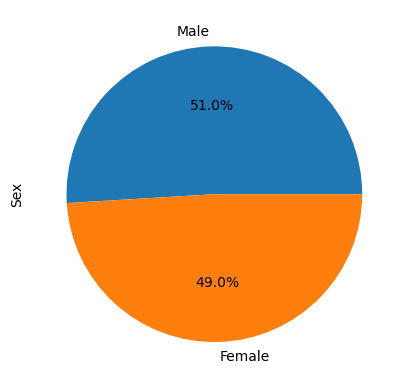

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
##Isolate data to summarize by gender and count by gender
pie_chart_count = clean_mice_data_df.groupby("Sex").size()
##Sorted to allow larger portion to show on top of pie chart
pie_chart_count = pie_chart_count.sort_values(ascending=False)
##Pie chart output
pie_chart_count.plot.pie(ylabel="Sex", autopct="%1.1f%%");

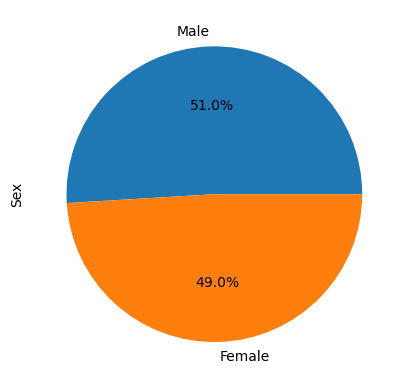

In [30]:
##Using the dataframes from the previous code block, generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    pie_chart_count,
    labels=pie_chart_count.index,
    autopct="%1.1f%%",
    shadow=False,
    startangle=0
)
plt.ylabel("Sex")
plt.show();

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin (created list for filtering)
regimen_list = ["Capomulin", 
                "Ramicane",
                "Infubinol",
                "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
##DF filtered for regimen_list above, then sorted and filtered
selected_regimens = clean_mice_data_df[clean_mice_data_df["Drug Regimen"].isin(regimen_list)]
selected_regimens = selected_regimens.sort_values(["Mouse ID","Timepoint"])
selected_regimens = selected_regimens.reset_index()
max_timepoint = selected_regimens.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
sel_reg_with_max = pd.merge(selected_regimens, max_timepoint, how="inner", on="Mouse ID")
sel_reg_with_max = sel_reg_with_max.rename(columns = {"Timepoint_y":"Max Timepoint",
                                                      "Timepoint_x":"Timepoint"})

In [32]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", 
                "Ramicane",
                "Infubinol",
                "Ceftamin"]

##creation of DF containing only Max Timepoint results
sel_reg_with_max["Tumor Size @ MaxTP"] = sel_reg_with_max["Tumor Volume"]\
        .where(sel_reg_with_max["Max Timepoint"] == sel_reg_with_max["Timepoint"])

sel_reg_with_max_cleaned_df = sel_reg_with_max.dropna(subset=["Tumor Size @ MaxTP"],inplace=False)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []
regimen_vol_data_list = []

##creation via for loop of populated lists from cleaned DF containing only Max Timepoint results
for x in range(len(sel_reg_with_max_cleaned_df)):
    tumor_vol_data_list.append(sel_reg_with_max_cleaned_df["Tumor Volume"].iloc[x])
    regimen_vol_data_list.append(sel_reg_with_max_cleaned_df["Drug Regimen"].iloc[x])
  
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
##creation of DF containing only drug regimen and tumor volume data based on drugs in selected 
##regimen_list and Max Timepoint tumor volumes
tumor_vol_data_list_df = pd.DataFrame({"Drug Regimen":regimen_vol_data_list,
                                       "Tumor Volume":tumor_vol_data_list})

    # Locate the rows which contain mice on each drug and get the tumor volumes
##creation of DF to isolate results by Drug Regimen using for loop
results_by_drug = {drug:[] for drug in regimen_vol_data_list}
for drug, result in zip(regimen_vol_data_list, tumor_vol_data_list):
    results_by_drug[drug].append(result)
results_by_drug_df = pd.DataFrame(results_by_drug, columns=regimen_list)

##creation of DF containing statistics of lower quartile, upper quartile, IQR, lower bound, and upper bound by Drug Regimen
## using for loops
iqr_dict = {drug:[] for drug in regimen_list}
#tumor_vol = results_by_drug_df["Tumor Volume"]
for drug in regimen_list:
    quartiles = results_by_drug_df[drug].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    #Append data into DF
    iqr_dict[drug].append(lowerq)
    iqr_dict[drug].append(upperq)
    iqr_dict[drug].append(iqr)
    iqr_dict[drug].append(lower_bound)
    iqr_dict[drug].append(upper_bound)
    
iqr_df = pd.DataFrame(iqr_dict)
iqr_df.index = ["lowerq",
                "upperq",
                "iqr",
                "lower_bound",
                "upper_bound"]

    # Determine outliers using upper and lower bounds
##creation of filter using upper/lower bounds to isolate possible outliers and saving results in a list using for loop
outliers = {drug:[] for drug in regimen_vol_data_list}
for drug, result in zip(regimen_vol_data_list, tumor_vol_data_list):
    if result > iqr_df[drug]["upper_bound"] or result < iqr_df[drug]["lower_bound"]:
        outliers[drug].append(result)

##Output of outliers by Drug Regimen
for drug in regimen_list:
    print(f"{drug}'s potential outliers:{outliers[drug]}")

Capomulin's potential outliers:[]
Ramicane's potential outliers:[]
Infubinol's potential outliers:[36.3213458]
Ceftamin's potential outliers:[]


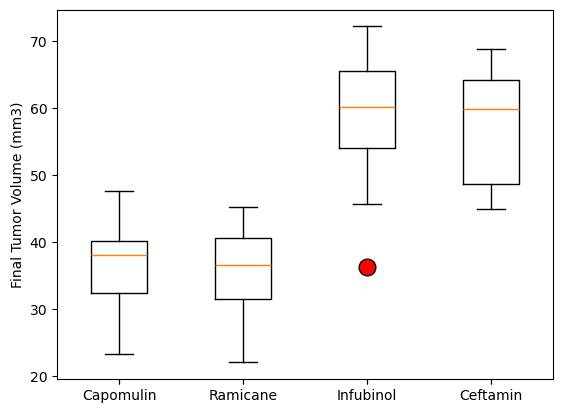

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.xaxis.set_ticks(range(1, len(regimen_list) + 1)) ##sets range of tickmarks from 1 through 4

##Creation of whisker/box plot, setting labels and outlier formatting
ax1.boxplot(results_by_drug_df,
            labels=regimen_list,
            flierprops={'markersize':12,
                        'markerfacecolor':'red'})
plt.show();

## Line and Scatter Plots

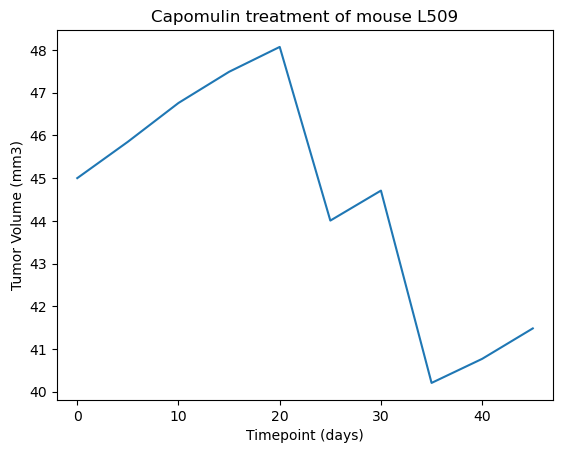

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

##Define data to be analyzed from DF
Timepoint = sel_reg_with_max.loc[(
    sel_reg_with_max["Mouse ID"]=="l509") & (sel_reg_with_max["Drug Regimen"]=="Capomulin"),"Timepoint"]
Tumor_size = sel_reg_with_max.loc[(
    sel_reg_with_max["Mouse ID"]=="l509") & (sel_reg_with_max["Drug Regimen"]=="Capomulin"),"Tumor Volume"]

##Set parameters and variables to be plotted on a line chart with output
fig, ax1 = plt.subplots()
plt.title("Capomulin treatment of mouse L509", fontsize=12)
ax1.set_xlim(min(Timepoint)-2, max(Timepoint)+2)
ax1.plot(Timepoint, Tumor_size, linewidth=1.5, marker="")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Timepoint (days)")
plt.show();

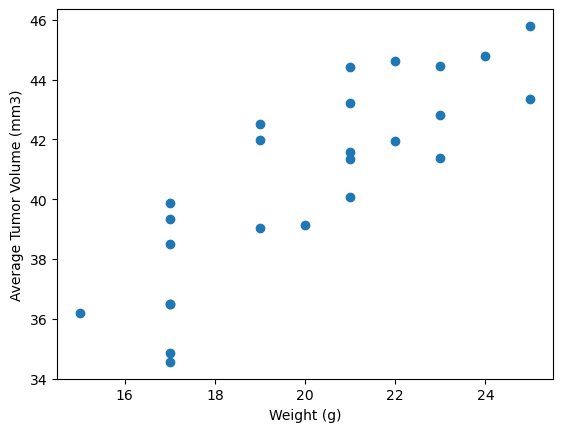

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

##Obtain data from earlier created DF to isolate only the necessary columns into new DF for analysis
weight_vs_avg_tum_vol = clean_mice_data_df[["Drug Regimen", "Mouse ID", "Weight (g)", "Tumor Volume"]]
weight_vs_avg_tum_vol = weight_vs_avg_tum_vol.sort_values(["Mouse ID", "Tumor Volume"])
weight_vs_avg_tum_vol = weight_vs_avg_tum_vol[weight_vs_avg_tum_vol["Drug Regimen"] == "Capomulin"]

##Calculate average tumor volume by weight/mouse and save to new DF
weight_vs_avg_tum_vol_df = []
mean_tum_vol2 = weight_vs_avg_tum_vol.groupby(weight_vs_avg_tum_vol["Mouse ID"])["Tumor Volume"].apply(np.mean)
weight_vs_avg_tum_vol_df = pd.merge(mean_tum_vol2, mouse_metadata, how="left", on="Mouse ID")
weight_vs_avg_tum_vol_df = weight_vs_avg_tum_vol_df.rename(columns={"Tumor Volume":"Avg Tumor Vol"})
weight_vs_avg_tum_vol_df = weight_vs_avg_tum_vol_df[["Drug Regimen",
                                                     "Mouse ID",
                                                     "Weight (g)",
                                                     "Avg Tumor Vol"]]

##Plot the two variables of mouse weight against average tumor volume into a scatter plot and output
x_values = weight_vs_avg_tum_vol_df["Weight (g)"]
y_values = weight_vs_avg_tum_vol_df["Avg Tumor Vol"]
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show();

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


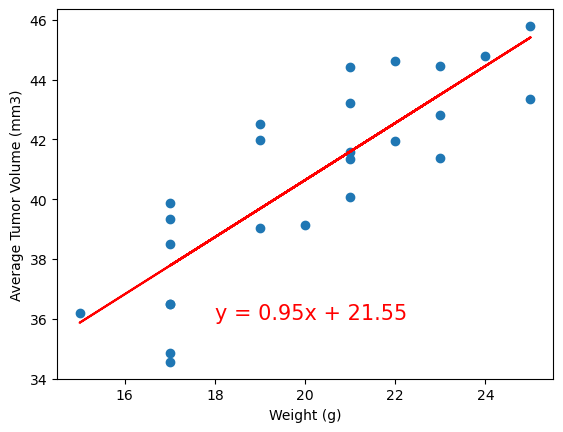

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

##Output of scatter plot from previous coding block
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

##Creation and output of linear regression model against scatter plot, 
##  plus output of correlation to the nearest two decimal points (also added best-fit line)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")
plt.show();